In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from matplotlib.colors import ListedColormap

# For spatial plots
import geopandas as gpd
from shapely.geometry import Point

In [2]:
df = pd.read_csv('GCBD/Cleaned_Coral_Data.csv')
df.head()

Latitude_Degrees  Longitude_Degrees Ocean_Name            Realm_Name  \
0            23.163           -82.5260   Atlantic     Tropical Atlantic   
1           -17.575          -149.7833    Pacific  Eastern Indo-Pacific   
2            18.369           -64.5640   Atlantic     Tropical Atlantic   
3            17.760           -64.5680   Atlantic     Tropical Atlantic   
4            17.769           -64.5830   Atlantic     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  \
0                     Cuba and Cayman Islands              Cuba   
1            Society Islands French Polynesia  French Polynesia   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdom   
3  Hispaniola Puerto Rico and Lesser Antilles     United States   
4  Hispaniola Puerto Rico and Lesser Antilles     United States   

  State_Island_Province_Name  City_Town_Name  Distance_to_Shore Exposure  ...  \
0                     Havana         8519.23            8519.23  Exposed  ...   
1            Society Islands         1431.62            1431.62  Exposed  ...   
2     British Virgin Islands          182.33             182.33  Exposed  ...   
3          US Virgin Islands          313.13             313.13  Exposed  ...   
4          US Virgin Islands          792.00             792.00  Exposed  ...   

   TSA_Mean  TSA_Frequency  TSA_Frequency_Standard_Deviation  \
0     -2.17           0.00                              1.09   
1     -1.26           0.25                              0.93   
2     -1.49           7.00                              1.31   
3     -1.49           3.00                              0.94   
4     -1.50           3.00                              1.33   

   TSA_FrequencyMax  TSA_FrequencyMean  TSA_DHW  TSA_DHW_Standard_Deviation  \
0               5.0                0.0     0.00                        0.74   
1               4.0                0.0     0.26                        0.67   
2               7.0                0.0     0.00                        1.04   
3               4.0                0.0     0.00                        0.75   
4               5.0                0.0     0.00                        0.92   

   TSA_DHWMax  TSA_DHWMean        Date  
0        7.25         0.18  2005-09-15  
1        4.65         0.19  1991-03-15  
2       11.66         0.26  2006-01-15  
3        5.64         0.20  2006-04-15  
4        6.89         0.25  2006-04-15  

[5 rows x 51 columns]

In [3]:
df.shape

(41066, 51)

In [4]:
df.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Ocean_Name                               0
Realm_Name                               0
Ecoregion_Name                           0
Country_Name                             0
State_Island_Province_Name               0
City_Town_Name                           0
Distance_to_Shore                        0
Exposure                                 0
Turbidity                                0
Cyclone_Frequency                        0
Date_Day                                 0
Date_Month                               0
Date_Year                                0
Depth_m                                  0
Percent_Cover                            0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41066 entries, 0 to 41065
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       41066 non-null  float64
 1   Longitude_Degrees                      41066 non-null  float64
 2   Ocean_Name                             41066 non-null  object 
 3   Realm_Name                             41066 non-null  object 
 4   Ecoregion_Name                         41066 non-null  object 
 5   Country_Name                           41066 non-null  object 
 6   State_Island_Province_Name             41066 non-null  object 
 7   City_Town_Name                         41066 non-null  float64
 8   Distance_to_Shore                      41066 non-null  float64
 9   Exposure                               41066 non-null  object 
 10  Turbidity                              41066 non-null  float64
 11  Cy

## Coral sites in the study (oceans and countries)

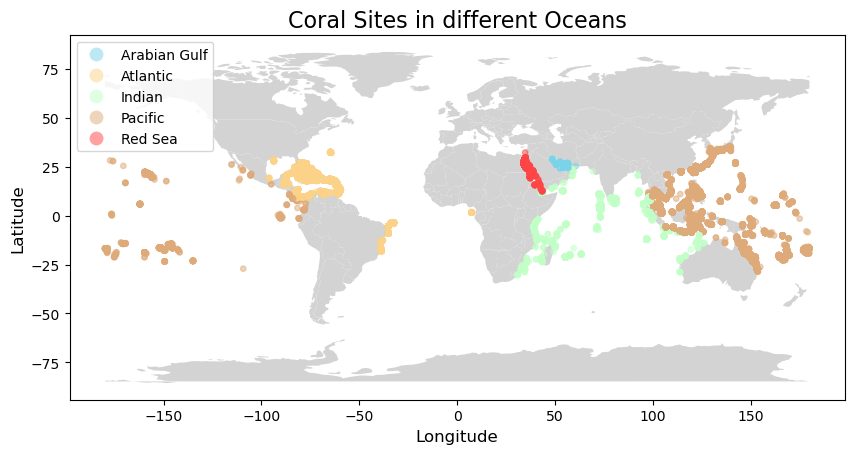

In [9]:
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude_Degrees'], df['Latitude_Degrees'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load a base map
world = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")

# Colormap
colors = ListedColormap(['#7BD3EA', '#FBD288', '#C2FFC7', '#DEAA79', '#FF4545'])

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgray')
geo_df.plot(
    ax=ax,
    column='Ocean_Name',  # Color by 'Ocean'
    categorical=True,
    legend=True,  # Add legend
    markersize=15,
    cmap=colors,  # Colormap for categories
    alpha=0.5
)

ax.set_title('Coral Sites in different Oceans', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.savefig('Plots/coral_sites_in_oceans.png')
plt.show()

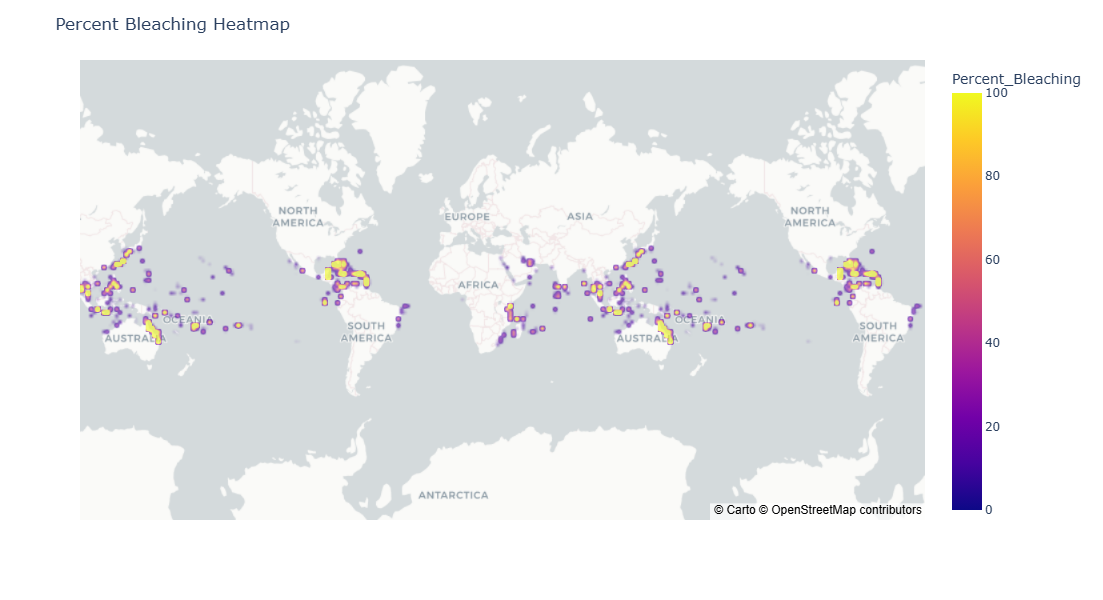

In [21]:
fig = px.density_mapbox(
    df,
    lat='Latitude_Degrees',
    lon='Longitude_Degrees',
    z='Percent_Bleaching',  # Value to visualize as density
    radius=2,             # Controls the smoothness of the heatmap
    center={'lat': df['Latitude_Degrees'].mean(), 'lon': df['Longitude_Degrees'].mean()},
    zoom=0,                # Initial zoom level
    mapbox_style="carto-positron",  # Use "stamen-terrain", "open-street-map", etc.
    opacity=0.6
)

# Control the size of the graph
fig.update_layout(
    width=800,  # Width of the graph in pixels
    height=600, # Height of the graph in pixels
    title="Percent Bleaching Heatmap"
)

fig.show()

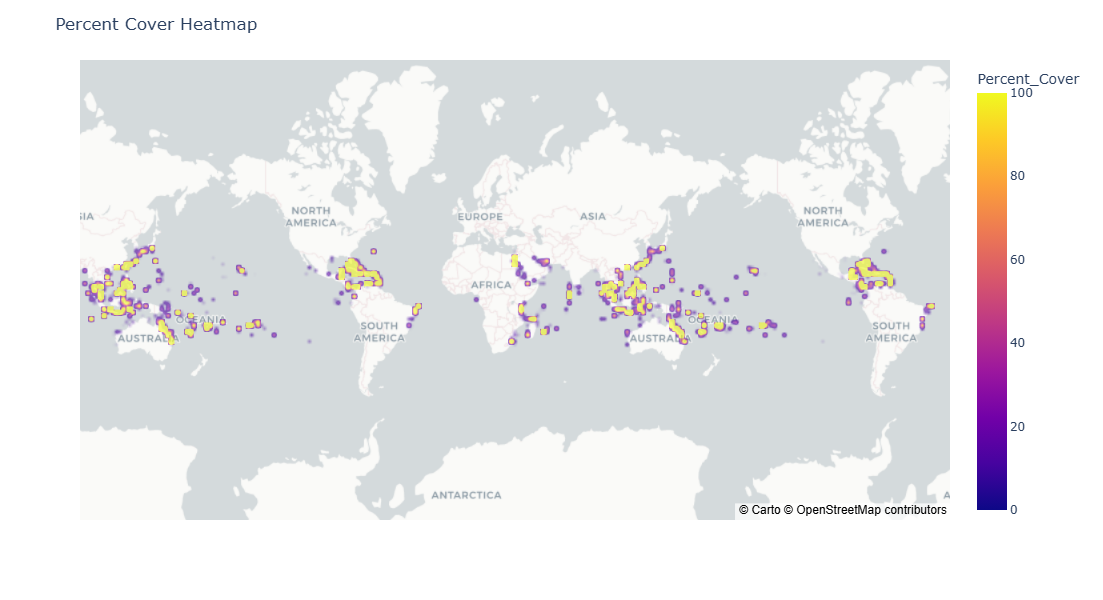

In [22]:
fig = px.density_mapbox(
    df,
    lat='Latitude_Degrees',
    lon='Longitude_Degrees',
    z='Percent_Cover',  # Value to visualize as density
    radius=2,             # Controls the smoothness of the heatmap
    center={'lat': df['Latitude_Degrees'].mean(), 'lon': df['Longitude_Degrees'].mean()},
    zoom=0,                # Initial zoom level
    mapbox_style="carto-positron",  # Use "stamen-terrain", "open-street-map", etc.
    opacity=0.6
)

# Control the size of the graph
fig.update_layout(
    width=800,  # Width of the graph in pixels
    height=600, # Height of the graph in pixels
    title="Percent Cover Heatmap"
)

fig.show()

## Temporal Trends of Percent Bleaching and Temperature

In [29]:
yearly_df = df.groupby('Date_Year')['ClimSST'].mean()
yearly_df = yearly_df.reset_index()
yearly_df.columns = ['Year', 'Mean ClimSST']
yearly_df.head()

Year  Mean ClimSST
0  1983     296.24200
1  1984     301.48000
2  1985     300.73000
3  1986     287.07000
4  1987     292.88102

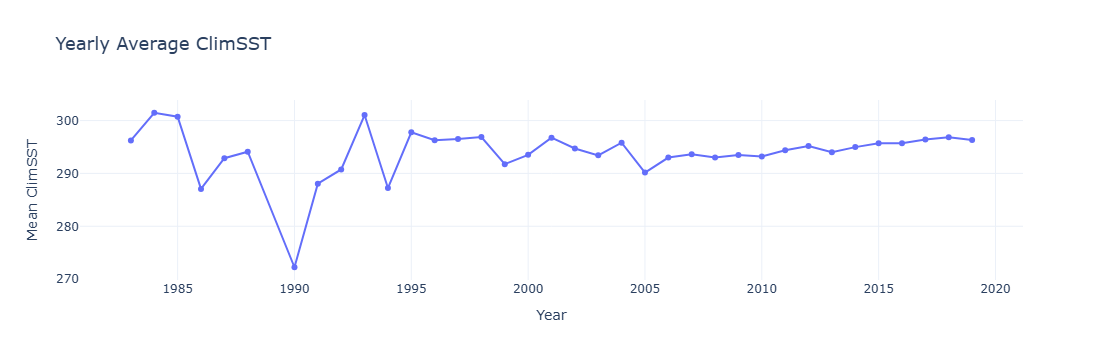

In [30]:
fig = px.line(
    yearly_df,
    x='Year',
    y='Mean ClimSST',
    title='Yearly Average ClimSST',
    labels={'Year': 'Year', 'Mean ClimSST': 'Mean ClimSST'},
    markers=True  # Adds markers to the line
)
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template="plotly_white"
)
fig.show()

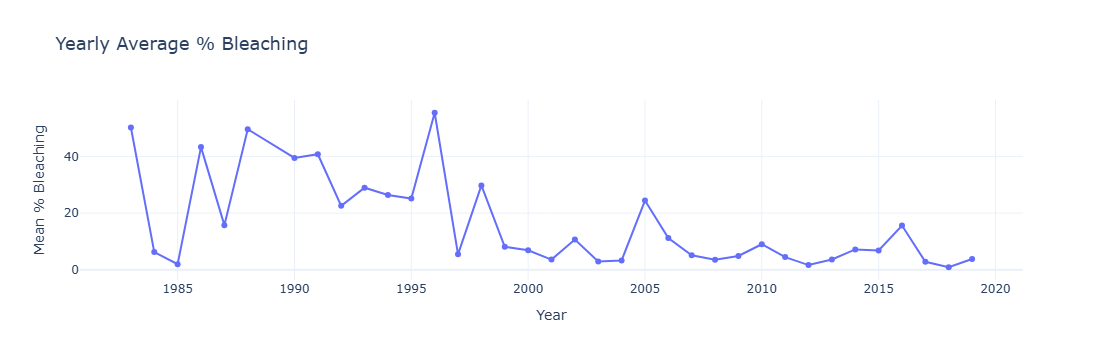

In [32]:
yearly_df = df.groupby('Date_Year')['Percent_Bleaching'].mean()
yearly_df = yearly_df.reset_index()
yearly_df.columns = ['Year', 'Mean % Bleaching']

fig = px.line(
    yearly_df,
    x='Year',
    y='Mean % Bleaching',
    title='Yearly Average % Bleaching',
    labels={'Year': 'Year', 'Mean % Bleaching': 'Mean % Bleaching'},
    markers=True  # Adds markers to the line
)
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template="plotly_white"
)
fig.show()